





















## Machine Learning Engineer Nanodegree

## Capstone Project

Sanjay KUmar Anuchuri
Date: dec 13, 2019

## Project: Using Supervised Learning to Predict Diabetic Females

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
%matplotlib inline
data = pd.read_csv("C:/Users/Personal/Desktop/Project Mega/diabetes.csv")


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Pregnancies                 2000 non-null int64
Glucose                     2000 non-null int64
BloodPressure               2000 non-null int64
SkinThickness               2000 non-null int64
Insulin                     2000 non-null int64
BMI                         2000 non-null float64
DiabetesPedigreeFunction    2000 non-null float64
Age                         2000 non-null int64
Outcome                     2000 non-null int64
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [3]:
data.shape

(2000, 9)

## exploration

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
data.groupby('Outcome').size()

Outcome
0    1316
1     684
dtype: int64

## Visualization

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

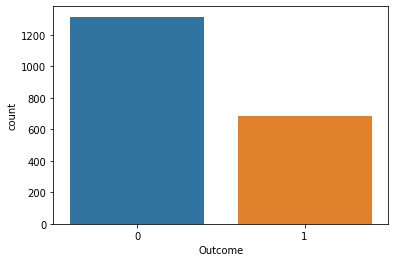

In [7]:
sns.countplot(data['Outcome'],label="count")

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

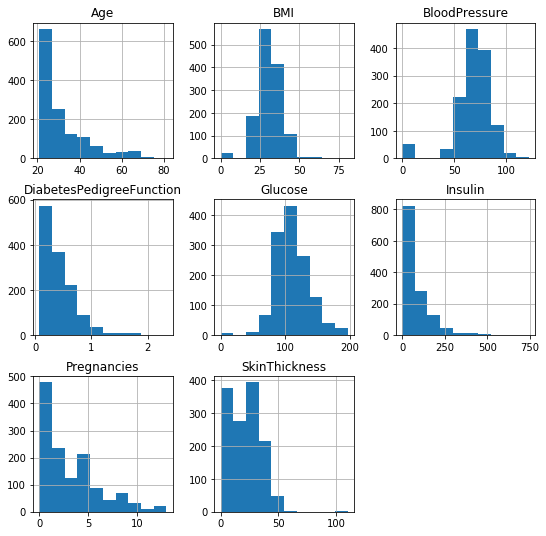

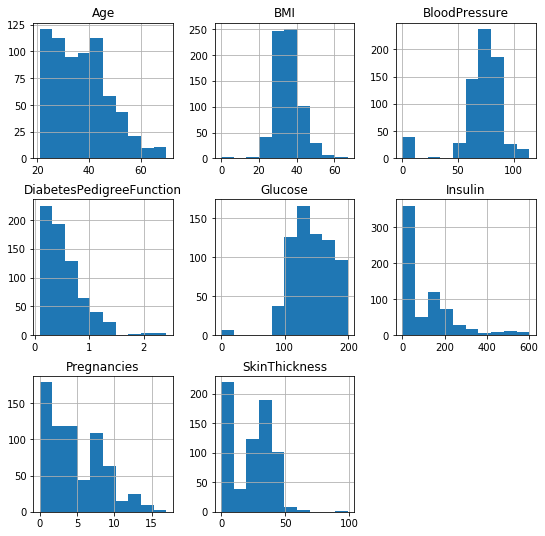

In [8]:
data.groupby('Outcome').hist(figsize=(9, 9))

Text(0, 0.5, 'skin thickness')

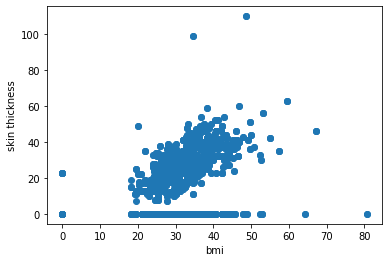

In [9]:
plt.scatter(data['BMI'],data['SkinThickness'])
plt.xlabel("bmi")
plt.ylabel("skin thickness")

Text(0, 0.5, 'dpf')

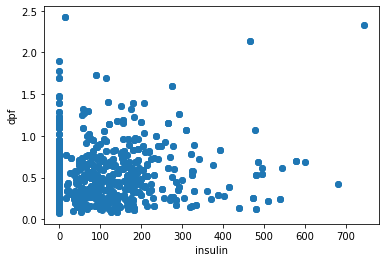

In [10]:
plt.scatter(data['Insulin'],data['DiabetesPedigreeFunction'])
plt.xlabel("insulin")
plt.ylabel("dpf")

Text(0, 0.5, 'glucose_concentraion')

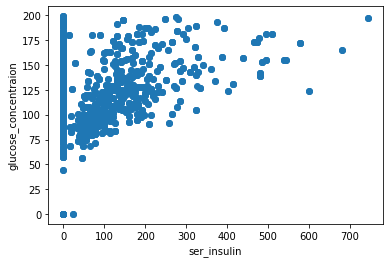

In [11]:
plt.scatter(data['Insulin'],data['Glucose'])
plt.xlabel("ser_insulin")
plt.ylabel("glucose_concentraion")

In [12]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
for field in data.columns[:8]:
    print('number of 0 entries for "{field_name}" feature: {amount}'.format(
        field_name=field,
        amount=np.count_nonzero(data[field] == 0)
    ))

number of 0 entries for "Pregnancies" feature: 301
number of 0 entries for "Glucose" feature: 13
number of 0 entries for "BloodPressure" feature: 90
number of 0 entries for "SkinThickness" feature: 573
number of 0 entries for "Insulin" feature: 956
number of 0 entries for "BMI" feature: 28
number of 0 entries for "DiabetesPedigreeFunction" feature: 0
number of 0 entries for "Age" feature: 0


In [15]:
diabetes_mod = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
print(diabetes_mod.shape)

(1888, 9)


In [16]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

## implementation

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(random_state=42)))
models.append(('LR', LogisticRegression(random_state=42)))
models.append(('DT', DecisionTreeClassifier(random_state=42)))
models.append(('GNB', GaussianNB()))
models.append(('AB', AdaBoostClassifier(random_state=42)))
models.append(('RF', RandomForestClassifier(random_state=42)))


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=42)

## Evaluation Metrics

In [19]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(fbeta_score(y_test, y_pred,0.5))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


  Name     Score
0  KNN  0.766753
1  SVC  0.982620
2   LR  0.669118
3   DT  0.942029
4  GNB  0.621795
5   AB  0.683594
6   RF  0.969388


C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\svm\base.py:193:

  Name     Score
0  KNN  0.807205
1  SVC  0.995767
2   LR  0.771741
3   DT  0.992063
4  GNB  0.754776
5   AB  0.803524
6   RF  0.989418


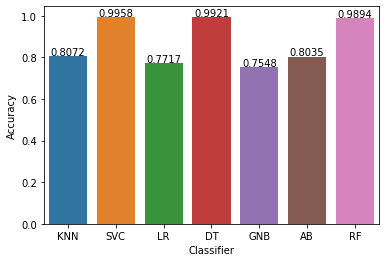

In [21]:
from sklearn.model_selection import KFold
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

##  Optimization

In [22]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
logreg_model = LogisticRegression()
rfecv = RFECV(estimator=logreg_model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X, y)

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [23]:
feature_importance = list(zip(feature_names, rfecv.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']


In [24]:
X_new = diabetes_mod[new_features]
initial_score = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))
fe_score = cross_val_score(logreg_model, X_new, y, cv=5, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7733395249352696 
Accuracy after Feature Selection : 0.7791624451198919 


C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

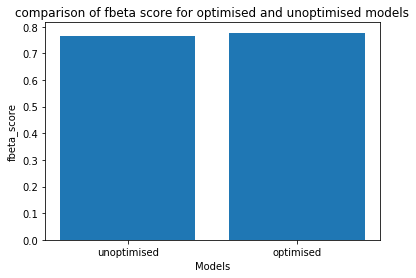

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
x=['unoptimised','optimised']
value=[0.7649,0.7773]
plt.bar(x,value)

plt.xlabel('Models')
plt.ylabel('fbeta_score')
plt.title('comparison of fbeta score for optimised and unoptimised models')
plt.show()

In [26]:
from sklearn import preprocessing
data2=preprocessing.normalize(data)

In [27]:
import pandas as pd
data3=pd.DataFrame(data2)
data3

,0,1,2,3,4,5,6,7,8
0,0.012070,0.832838,0.374174,0.211227,0.000000,0.202778,0.000766,0.283648,0.006035
1,0.000000,0.466996,0.455877,0.172344,0.694935,0.212372,0.001295,0.127868,0.000000
2,0.000000,0.937123,0.000000,0.000000,0.000000,0.285661,0.004072,0.200350,0.006463
3,0.000000,0.451307,0.227325,0.140407,0.835754,0.141410,0.001220,0.080232,0.003343
4,0.001971,0.274004,0.122218,0.080821,0.946201,0.080230,0.001057,0.041396,0.000000
...,...,...,...,...,...,...,...,...,...
1995,0.016171,0.606394,0.517456,0.194046,0.444689,0.240132,0.002992,0.266813,0.000000
1996,0.033127,0.741216,0.298143,0.173917,0.538314,0.135407,0.002977,0.149071,0.004141
1997,0.047312,0.670256,0.615059,0.000000,0.000000,0.246024,0.003012,0.331186,0.000000
1998,0.000000,0.560676,0.478096,0.199931,0.565022,0.291639,0.001386,0.113004,0.004346


In [28]:
for field in data3.columns[:8]:
    print('number of 0 entries for "{field_name}" feature: {amount}'.format(
        field_name=field,
        amount=np.count_nonzero(data3[field] == 0)
    ))

number of 0 entries for "0" feature: 301
number of 0 entries for "1" feature: 13
number of 0 entries for "2" feature: 90
number of 0 entries for "3" feature: 573
number of 0 entries for "4" feature: 956
number of 0 entries for "5" feature: 28
number of 0 entries for "6" feature: 0
number of 0 entries for "7" feature: 0


In [4]:
!pip install anvil-uplink
import anvil.server
anvil.server.connect("OD47GHWSLTNYI26KE3GPV6GG-QI2MPLGVORWT3ZRQ")

  Using cached https://files.pythonhosted.org/packages/8c/46/8962b00130fba310654cb674462e3301f347132e8fbb49e01fe7db2e3c2c/anvil_uplink-0.3.26-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f2/94/3af39d34be01a24a6e65433d19e107099374224905f1e0cc6bbe1fd22a2f/argparse-1.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/aa/60/5d135c8161a2a67d7c227d57bb599fad967d818dbcdca08daa2d60eb87b9/ws4py-0.3.4.tar.gz
  Created wheel for ws4py: filename=ws4py-0.3.4-cp37-none-any.whl size=41816 sha256=681721374a4da963d277175dbfdb65bb05de1f89cf677bc8cbf252ce33a364bd
  Stored in directory: C:\Users\Personal\AppData\Local\pip\Cache\wheels\19\1f\0d\beff5822af761b66067b5e0b251a9c66af3ae15828ee9a8f15
Successfully built ws4py
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\server.py", line 283, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\server.py", line 275, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\_threaded_server.py", line 357, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Personal\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Personal\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\a

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

Exception in thread Thread-10:
Traceback (most recent call last):
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\server.py", line 283, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\server.py", line 275, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\_threaded_server.py", line 357, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Personal\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Personal\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-13:
Traceback (most recent call last):
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\server.py", line 283, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\server.py", line 275, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\_threaded_server.py", line 357, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Personal\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Personal\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK
Anvil websocket closed (code 1006, reason=Going away)


Exception in thread Thread-16:
Traceback (most recent call last):
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\server.py", line 283, in call
    return _do_call(args, kwargs, fn_name=fn_name)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\server.py", line 275, in _do_call
    return _threaded_server.do_call(args, kwargs, fn_name=fn_name, live_object=live_object)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\anvil\_threaded_server.py", line 357, in do_call
    raise _server._deserialise_exception(r["error"])
anvil._server.AnvilWrappedError: 'Connection to Anvil Uplink server lost'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Personal\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Personal\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Personal\Anaconda3\lib\site-packages\

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnecting Anvil Uplink...
Connecting to wss://anvil.works/uplink
Reconnection failed. Waiting 10 seconds, then retrying.
Reconnec

In [ ]:
@anvil.server.callable
def say_hello(name):
  print("Hello from the uplink, %s!" % name)

anvil.server.wait_forever()
